In [56]:
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings("ignore")

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

# DataBase
</span>

In [3]:
df = pd.read_csv(
    '../data/mall/Mall_Customers.csv',
    sep = ',', encoding = 'iso-8859-1'
)

In [4]:
df.shape

(2000, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Atributos do DataFrame

- **CustomerID:** identificação do cliente.

- **Genre:** Gênero.

- **Age:** Idade.

- **Annual Income (k$):**	Rendimento anual.

- **Spending Score (1 a 100):** Pontuação de gastos.

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Análise Gráfica dos atributos
</span>

**Idade**

In [6]:
colors = px.colors.qualitative.Dark24_r
hist = px.histogram(
    df, x='Age', nbins=60, 
    labels={'Age': 'Idade', 'count': 'Número de Pessoas'},
    title='Distribuição das Idades',
    color_discrete_sequence=[colors[0]]
)
hist.update_layout(
    width=600, height=400, 
    xaxis_title='Idade',
    yaxis_title='Número de Pessoas',
    title_x=0.5, 
    margin=dict(l=50, r=50, t=50, b=50),
)
hist.show()

**Gênero**

In [7]:
df['Genre'].value_counts()

Genre
Female    1115
Male       885
Name: count, dtype: int64

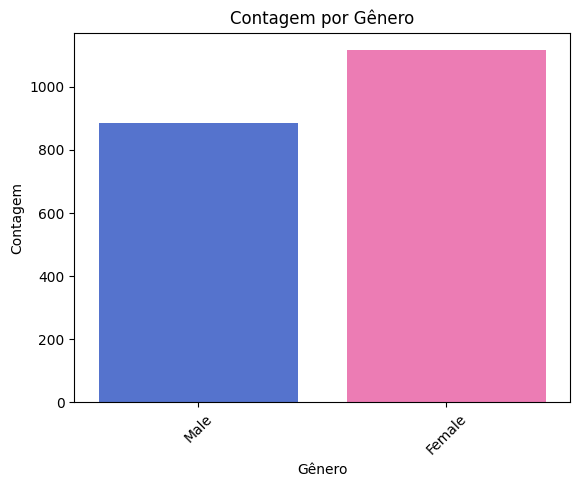

In [8]:
colors = {'Female': 'hotpink', 'Male': 'royalblue'}
sns.countplot(x='Genre', data=df, palette=colors)
plt.title('Contagem por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

# Exploração e tratamento dos dados

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Alterando nomes das colunas
</span>

In [9]:
df.rename(
    columns = {'CustomerID': 'ID'},
    inplace = True
)
df.rename(
    columns = {'Genre': 'genero'},
    inplace = True
)
df.rename(
    columns = {'Age': 'idade'},
    inplace = True
)
df.rename(
    columns = {'Annual Income (k$)': 'rendimento'},
    inplace = True
)
df.rename(
    columns = {'Spending Score (1-100)': 'pontuacao'},
    inplace = True
)

In [10]:
df.head(3)

,ID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análises

</span>

**Valores Missing**

In [11]:
df.isnull().sum()

ID            0
genero        0
idade         0
rendimento    0
pontuacao     0
dtype: int64

**Tipos de atributos**

In [12]:
df.dtypes

ID             int64
genero        object
idade          int64
rendimento     int64
pontuacao      int64
dtype: object

**Dados Estatísticos**

In [13]:
df.describe()

,ID,idade,rendimento,pontuacao
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,600.495000,35.170000,74.71650,29.722500
std,305.580406,10.520097,33.21942,25.109535
min,1.000000,18.000000,13.00000,1.000000
25%,350.750000,26.000000,46.00000,10.000000
50%,600.500000,35.000000,75.00000,11.000000
75%,850.250000,44.000000,100.00000,50.000000
max,1200.000000,70.000000,146.00000,99.000000


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise dos Outliers
</span>

**Rendimento**

In [14]:
boxplot = px.box(
    df, y = "rendimento"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Idade**

In [15]:
boxplot = px.box(
    df, y = "idade"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Pontuação**

In [16]:
boxplot = px.box(
    df, y = "pontuacao"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Pré-processamento
</span>

**Exluir identificação do cliente**

In [17]:
df_att = df.drop(labels = 'ID', axis = 1)

In [18]:
df_att.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Transformando variáveis categóricas em numéricas (encoder manual)
</span>

In [19]:
df_att['genero'].replace({
    'Female': 0,
    'Male': 1
}, inplace = True)

In [20]:
df_att.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Escalonamento
</span>

In [21]:
scale = StandardScaler()

In [22]:
df_esc = scale.fit_transform(df_att)

In [23]:
df_esc

array([[ 1.12244688, -1.53744251, -1.7980878 ,  0.36957356],
       [ 1.12244688, -1.34728265, -1.7980878 ,  2.04266326],
       [-0.89091075, -1.44236258, -1.7679774 , -0.94499691],
       ...,
       [-0.89091075, -0.49156325,  1.6947188 , -0.74581957],
       [ 1.12244688, -1.15712278,  1.7248292 , -0.86532597],
       [-0.89091075, -1.06204285,  1.7549396 , -0.82549051]])

<span style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif;">

# K-Means

**Introdução**

O algoritmo K-Means é um método de clustering amplamente utilizado em machine learning para agrupar dados não rotulados em grupos distintos baseados em suas características.

**Conceito**

O algoritmo K-Means funciona particionando o conjunto de dados em K clusters distintos, onde cada ponto de dados pertence ao cluster com o centróide mais próximo. </br>
O centróide de um cluster é o ponto médio de todos os pontos de dados no cluster.

O objetivo do K-Means é encontrar centróides que minimizem a soma dos quadrados das distâncias entre os pontos de dados e seus centróides correspondentes. Isso é conhecido como a função de custo do algoritmo.

**Fórmulas**

As fórmulas principais do algoritmo K-Means são:

1. **Distância Euclidiana:** </br>
- A distância entre dois pontos em um espaço euclidiano é dada por:
   
   $[ \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} ]$

2. **Função de custo:** </br>
- A função de custo, ou inércia, é a soma das distâncias quadradas de cada ponto para o centróide do seu cluster:
   
   $[ J = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2 ]$

   Onde:
   - $( K )$ é o número de clusters.
   - $( C_i )$ é o conjunto de pontos no i-ésimo cluster.
   - $( \mu_i )$ é o centróide do i-ésimo cluster.

**Parâmetros**

Os principais parâmetros do algoritmo K-Means são:

- **Número de clusters (K):** </br>
   - O número de clusters que desejamos encontrar nos dados.
- **Inicialização:** </br>
   - Método para inicializar os centróides dos clusters. Pode ser aleatório ou baseado em heurísticas.
- **Critério de parada:** </br>
   - Condição para terminar a iteração, como número máximo de iterações ou convergência da função de custo.

**Definição do número de clusters** </br>
Uma questão crucial ao aplicar o algoritmo K-Means é determinar o número ideal de clusters. Aqui estão algumas técnicas comuns:
- ### **Elbow Method** </br>
   - O método do cotovelo é uma técnica visual para determinar o número ótimo de clusters. Ele envolve plotar o valor da função de custo (inércia) </br>
   em relação ao número de clusters e identificar o ponto onde a redução na inércia começa a diminuir significativamente, formando um "cotovelo" na curva.
- **Método Silhouette** </br>
   - Calcula a similaridade média dos pontos dentro do mesmo cluster e a dissimilaridade média dos pontos em clusters diferentes. O valor máximo indica um bom agrupamento.
- **Validação Externa** </br>
   - Usar métricas externas, como índice de Rand ajustado ou índice de Fowlkes-Mallows, se rótulos de clusters conhecidos estiverem disponíveis.


</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

## K-Means com dois atributos
</span>

**Selecionando os atributos**

In [24]:
data = df_att.iloc[:, 2:4].values

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Elbow Method
</span>

<span style="font-size: 15px; font-family: 'Trebuchet MS', sans-serif;">

#### WCSS
**Within-Cluster Sum of Squares**: 
- WCSS é usado para calcular a soma dos quadrados intra-cluster para diferentes valores de K (número de clusters) usando o algoritmo K-Means. </br></br>
**inertia_** 
- A inércia é a soma das distâncias quadradas dos pontos de dados para os centróides de seus clusters correspondentes. 
    - Após o cálculo da inércia podemos usar a WCSS para valores de K usando um intervalo em um loop `for` para plotar o elbow method e determinar o número ideal de clusters para os dados.
</span>

In [25]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(
        n_clusters = i, init = 'k-means++',
        random_state = 5, max_iter = 300
    )
    kmeans.fit(data)
    # inertia: metódo para gerar o wcss
    wcss.append(kmeans.inertia_)

<span style="font-family: 'Trebuchet MS', sans-serif;">

#### Gráfico do Elbow Method
</span>

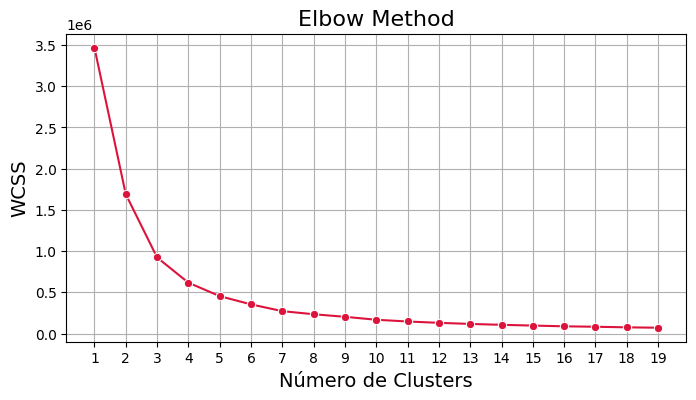

In [26]:
plt.figure(figsize=(8,4))  
sns.lineplot(x=range(1, 20), y=wcss, marker='o', color='crimson') 
plt.title('Elbow Method', fontsize=16) 
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

#### Agrupamento
</span>

In [27]:
kmeans = KMeans(
    n_clusters = 5, init = 'k-means++',
    random_state = 5, max_iter = 300
)

In [28]:
kmeans1 = kmeans.fit(data);

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Coordenadas dos centróides
</span>

In [29]:
centroides = kmeans1.cluster_centers_
centroides

array([[ 87.74143836,  19.59417808],
       [ 38.76130653,  10.2361809 ],
       [ 36.06477733,  74.        ],
       [ 67.26719577,  55.85978836],
       [123.23155216,  11.5394402 ]])

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Classificação dos dados
</span>

In [30]:
classificacao = kmeans1.labels_
classificacao

array([1, 2, 1, ..., 4, 4, 4])

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Gráfico
</span>

In [31]:
graf1 = px.scatter(
    x = data[:, 0], y = data[:, 1], color = classificacao
)
graf2 = px.scatter(
    x = centroides[:, 0], y = centroides[:, 1]
)
graf2.update_traces(marker=dict(size=15))
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(
    width=800, height=500,
    title_text='Agrupamento K-Means',
    xaxis_title='Rendimento anual (K$)',
    yaxis_title='Pontuação'
)
graf3.show()

In [32]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,2
2,1
3,2
4,1
...,...
1995,4
1996,4
1997,4
1998,4


In [33]:
df3 = pd.concat([df, agrupamento], axis = 1)
df3

,ID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
1995,1196,Female,28,129,9,4
1996,1197,Male,29,130,10,4
1997,1198,Female,30,131,11,4
1998,1199,Male,23,132,8,4


In [34]:
df3.iloc[150, :]

ID             151
genero        Male
idade           43
rendimento      78
pontuacao       17
Grupo            0
Name: 150, dtype: object

In [35]:
df3.loc[df3.ID == 92]

,ID,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,3


<span style="font-family: 'Trebuchet MS', sans-serif;">

## K-Means com todos os atributos
</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Elbow Method
</span>

In [36]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(
        n_clusters = i, init = 'k-means++',
        random_state = 5, max_iter = 10000
    )
    kmeans.fit(df_esc)
    wcss.append(kmeans.inertia_)

<span style="font-family: 'Trebuchet MS', sans-serif;">

#### Gráfico
</span>

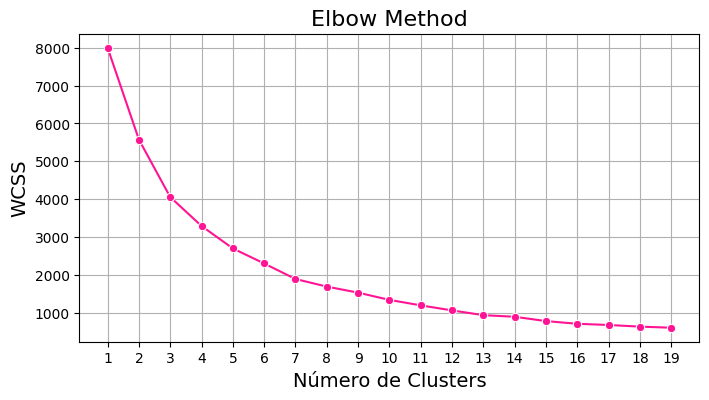

In [37]:
plt.figure(figsize=(8,4))  
sns.lineplot(x=range(1, 20), y=wcss, marker='o', color='deeppink') 
plt.title('Elbow Method', fontsize=16) 
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

#### Agrupamento
</span>

In [38]:
kmeans = KMeans(
    n_clusters = 7, init = 'k-means++',
    random_state = 5, max_iter = 10000
)

In [39]:
kmeans2 = kmeans.fit(df_esc);

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Centróides
</span>

In [40]:
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.11041487,  0.97024336,  0.51837378, -0.09615227],
       [-0.7701093 , -0.76403517, -0.69303606,  1.52047717],
       [-0.89091075, -0.46355789, -0.86893555, -0.77522539],
       [ 1.12244688, -0.9676943 ,  1.59836551, -0.81568485],
       [-0.86086064,  1.24967671, -0.66902264,  1.06362238],
       [-0.89091075, -0.28269411,  1.0221884 , -0.76959235],
       [ 1.12244688, -0.56000441, -0.72800047, -0.60296133]])

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Classificação dos dados
</span>

In [41]:
classificacao2 = kmeans2.labels_
classificacao2

array([6, 1, 2, ..., 5, 3, 5])

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Inversão do escalonamento
</span>

In [42]:
scale.inverse_transform(kmeans2.cluster_centers_)

array([[ 9.94023904e-01,  4.53745020e+01,  9.19322709e+01,
         2.73087649e+01],
       [ 6.00000000e-02,  2.71342857e+01,  5.17000000e+01,
         6.78914286e+01],
       [ 4.44089210e-16,  3.02945455e+01,  4.58581818e+01,
         1.02618182e+01],
       [ 1.00000000e+00,  2.49923077e+01,  1.27800000e+02,
         9.24615385e+00],
       [ 1.49253731e-02,  4.83134328e+01,  5.24975124e+01,
         5.64228856e+01],
       [-3.33066907e-16,  3.21967742e+01,  1.08664516e+02,
         1.04032258e+01],
       [ 1.00000000e+00,  2.92801724e+01,  5.05387931e+01,
         1.45862069e+01]])

<span style="font-family: 'Trebuchet MS', sans-serif;">

## K-Means com PCA
</span>

In [44]:
pca = PCA(n_components = 2)

In [45]:
df2_pca = pca.fit_transform(df_esc)

In [46]:
df2_pca

array([[ 0.96133162, -0.38699117],
       [ 1.85106946,  0.41701816],
       [ 1.30154662, -1.46566991],
       ...,
       [-0.82746028, -1.35862001],
       [-1.88385317, -1.32332653],
       [-0.79236934, -1.87993492]])

In [47]:
pca.explained_variance_ratio_

array([0.40889964, 0.27254318])

In [48]:
pca.explained_variance_ratio_.sum()

0.6814428271461338

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Elbow Method
</span>

In [49]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(
        n_clusters = i, init = 'k-means++',
        random_state = 5, max_iter = 10000
    )
    kmeans.fit(df2_pca)
    wcss.append(kmeans.inertia_)

<span style="font-family: 'Trebuchet MS', sans-serif;">

#### Gráfico
</span>

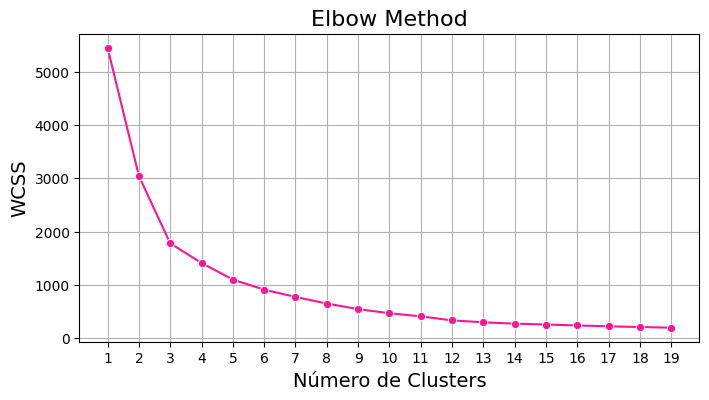

In [50]:
plt.figure(figsize=(8,4))  
sns.lineplot(x=range(1, 20), y=wcss, marker='o', color='deeppink') 
plt.title('Elbow Method', fontsize=16) 
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()
#13

<span style="font-family: 'Trebuchet MS', sans-serif;">

#### Agrupamento
</span>

In [57]:
kmeans = KMeans(
    n_clusters = 13, init = 'k-means++',
    random_state = 5, max_iter = 1000
)

In [58]:
kmeans3 = kmeans.fit(df2_pca)

**Coordenadas dos centróides**

In [59]:
centroides = kmeans3.cluster_centers_
centroides

array([[ 2.36683915, -0.31215779],
       [-1.48249267,  0.14695601],
       [ 0.56183537, -1.14429127],
       [-0.17308109,  2.50957127],
       [ 0.89414762,  1.04806022],
       [-0.48321126, -0.52145021],
       [-0.8100081 ,  1.07000313],
       [-1.84117724, -1.12800004],
       [ 1.21645392, -0.09428975],
       [-0.69425746, -1.71399855],
       [-1.65092803,  1.26223947],
       [-0.15505521,  0.44306971],
       [ 1.90820438,  1.57990076]])

**Classificação dos dados**

In [60]:
classificacao3 = kmeans3.labels_
classificacao3

array([8, 8, 2, ..., 9, 7, 9])

<span style="font-family: 'Trebuchet MS', sans-serif;">

##### Gráfico de dispersão
</span>

In [61]:
graf1 = px.scatter(
    x = df2_pca[:, 0], y = df2_pca[:, 1], color = classificacao3
)
graf2 = px.scatter(
    x = centroides[:, 0], y = centroides[:, 1]
)
graf2.update_traces(marker=dict(size=15))
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(
    width=800, height=500,
    title_text='Agrupamento K-Means com PCA',
    xaxis_title='Componente 1',
    yaxis_title='Componente 2'
)
graf3.show()

In [62]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

,Grupo
0,8
1,8
2,2
3,0
4,0
...,...
1995,9
1996,7
1997,9
1998,7


In [63]:
df4 = pd.concat([df, agrupamento3], axis = 1)
df4

,ID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,8
1,2,Male,21,15,81,8
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
1995,1196,Female,28,129,9,9
1996,1197,Male,29,130,10,7
1997,1198,Female,30,131,11,9
1998,1199,Male,23,132,8,7
